12.1 Bar Plot


In [1]:
library(DOSE)
data(geneList)
de <- names(geneList)[abs(geneList) > 2]

Warning message:
“multiple methods tables found for ‘splitAsList’”
Warning message:
“replacing previous import ‘S4Vectors::splitAsList’ by ‘IRanges::splitAsList’ when loading ‘AnnotationDbi’”


DOSE v3.14.0  For help: https://guangchuangyu.github.io/software/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




In [2]:
edo <- enrichDGN(de)

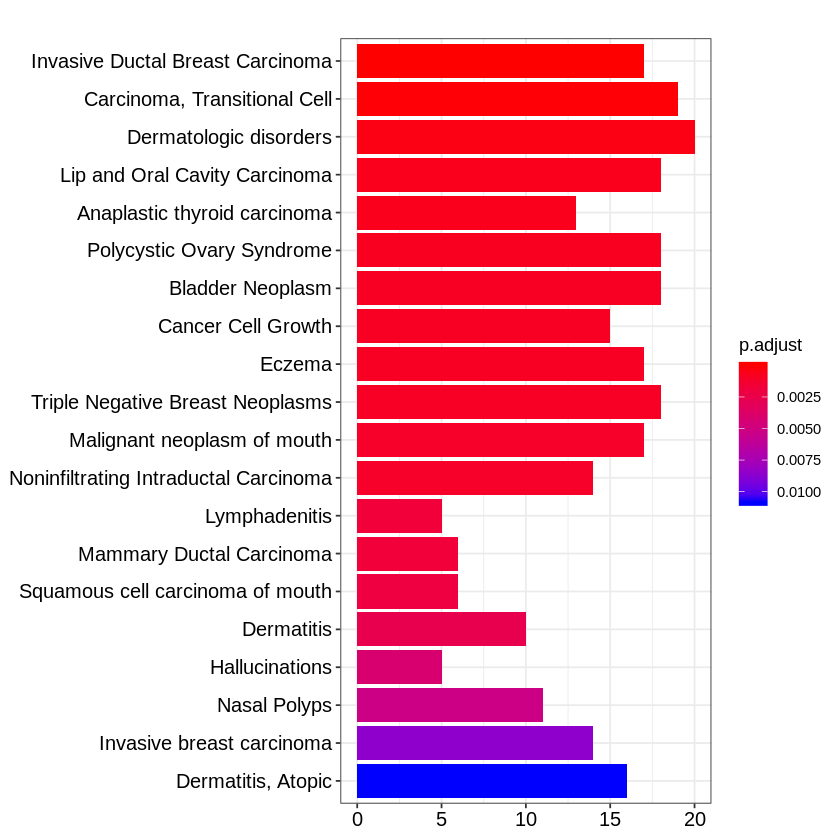

In [3]:
library(enrichplot)
barplot(edo, showCategory=20)

12.2 Dot plot


In [4]:
edo2 <- gseNCG(geneList)#, nPerm=10000)

preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



In [5]:
head(edo2)

ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [6]:
p1 <- dotplot(edo, showCategory=30) + ggtitle("dotplot for ORA")

In [7]:
p2 <- dotplot(edo2, showCategory=30) + ggtitle("dotplot for GSEA")

ERROR: Error in str_count(res$core_enrichment, "/") + 1: non-numeric argument to binary operator


In [8]:
plot_grid(p1, p2, ncol=2)

ERROR: Error in plot_grid(p1, p2, ncol = 2): object 'p2' not found


In [ ]:
## convert gene ID to Symbol
edox <- setReadable(edo, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange=geneList)
## categorySize can be scaled by 'pvalue' or 'geneNum'
p2 <- cnetplot(edox, categorySize="pvalue", foldChange=geneList)
p3 <- cnetplot(edox, foldChange=geneList, circular = TRUE, colorEdge = TRUE)
cowplot::plot_grid(p1, p2, p3, ncol=3, labels=LETTERS[1:3], rel_widths=c(.8, .8, 1.2))

something wrong with this. 

In [ ]:
p1 <- cnetplot(edox, node_label="category") 
p2 <- cnetplot(edox, node_label="gene") 
p3 <- cnetplot(edox, node_label="all") 
p4 <- cnetplot(edox, node_label="none") 
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

12.4 Heatmap-like functional classification


In [ ]:
p1 <- heatplot(edox)
p2 <- heatplot(edox, foldChange=geneList)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

12.5 Enrichment Map


In [ ]:
p1 <- emapplot(edo)
p2 <- emapplot(edo, pie_scale=1.5)
p3 <- emapplot(edo,layout="kk")
p4 <- emapplot(edo, pie_scale=1.5,layout="kk") 
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

In [ ]:
library(clusterProfiler)
data(gcSample)
xx <- compareCluster(gcSample, fun="enrichKEGG",
                     organism="hsa", pvalueCutoff=0.05)
p1 <- emapplot(xx)
p2 <- emapplot(xx,legend_n=2) 
p3 <- emapplot(xx,pie="count")
p4 <- emapplot(xx,pie="count", pie_scale=1.5, layout="kk")
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

12.6 UpSet Plot


In [ ]:
BiocManager::install("ggupset")
upsetplot(edo)

unsolved: what is the kk2?

In [ ]:
upsetplot(edo2) 

12.7 ridgeline plot for expression distribution of GSEA result

In [ ]:
ridgeplot(edo2)

12.8 running score and preranked list of GSEA result

In [ ]:
p1 <- gseaplot(edo2, geneSetID = 1, by = "runningScore", title = edo2$Description[1])
p2 <- gseaplot(edo2, geneSetID = 1, by = "preranked", title = edo2$Description[1])
p3 <- gseaplot(edo2, geneSetID = 1, title = edo2$Description[1])
cowplot::plot_grid(p1, p2, p3, ncol=1, labels=LETTERS[1:3])

In [ ]:
gseaplot2(edo2, geneSetID = 1, title = edo2$Description[1])

In [ ]:
gseaplot2(edo2, geneSetID = 1:3)

In [ ]:
gseaplot2(edo2, geneSetID = 1:3, pvalue_table = TRUE,
          color = c("#E495A5", "#86B875", "#7DB0DD"), ES_geom = "dot")

In [ ]:
p1 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1)
p2 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1:2)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

In [ ]:
gsearank(edo2, 1, title = edo2[1, "Description"])

In [ ]:
library(ggplot2)
library(cowplot)

In [ ]:
pp <- lapply(1:3, function(i) {
  anno <- edo2[i, c("NES", "pvalue", "p.adjust")]
  lab <- paste0(names(anno), "=",  round(anno, 3), collapse="\n")
  
  gsearank(edo2, i, edo2[i, 2]) + xlab(NULL) +ylab(NULL) +
    annotate("text", 0, edo2[i, "enrichmentScore"] * .9, label = lab, hjust=0, vjust=0)
})
plot_grid(plotlist=pp, ncol=1)

12.9 pubmed trend of enriched terms

In [ ]:
terms <- edo$Description[1:3]
p <- pmcplot(terms, 2010:2017)
p2 <- pmcplot(terms, 2010:2017, proportion=FALSE)
plot_grid(p, p2, ncol=2)

12.10 goplot
where is this ego? I don't find this. 

In [ ]:
goplot(ego)

12.11 browseKEGG
kk not found ???

In [ ]:
browseKEGG(kk, 'hsa04110')

12.12 pathview from pathview package


In [ ]:
library("pathview")
library("pathview")
hsa04110 <- pathview(gene.data  = geneList,
                     pathway.id = "hsa04110",
                     species    = "hsa",
                     limit      = list(gene=max(abs(geneList)), cpd=1))